# SMS Message Spam Classification - Using NLP



## Objective

In this Notebook we will perform following tasks

- Process the raw text message, cleaning and make it prepare for the model's input
- create a classifier using which we can predict whether a message is spam or not

## Data

In this project, we have used the ***UCI 
SMS Spam Collection Data Set***

Link: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

In [ ]:
# import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import nltk

In [ ]:
nltk.download('all')

In [ ]:
# read & load the dataset into the pandas dataframe
df = pd.read_csv('/content/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [ ]:
# No. of Rows & Columns in the Dataset
print(f'No. of Rows: {df.shape[0]}, Columns: {df.shape[1]}')

No. of Rows: 5572, Columns: 2


In [ ]:
# See first 5 records of the Dataset
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


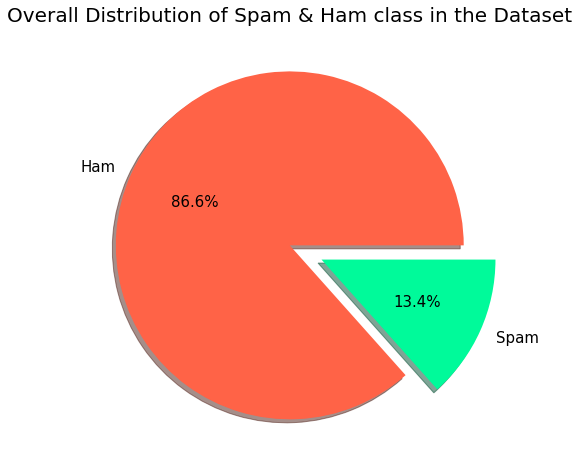

In [ ]:
# Plot the overall distribution of the different classes in the Dataset

plt.figure(figsize=(12, 8))
size = list(df['label'].value_counts())
labels = ['Ham', 'Spam']
colors = ['tomato', 'mediumspringgreen']
explode = [0, 0.2]


plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, 
        autopct='%1.1f%%', labeldistance=1.1, textprops={'fontsize':15});

plt.title('Overall Distribution of Spam & Ham class in the Dataset', size=20);

**Remarks:**

As our dataset **majorly (86.6%)** contains **Ham class**, and  **only (13.4%)** of **spam class**, we can say it's an **imbalance dataset**.

## Data Pre-Processing

As our dataset contains raw text message we will perform followings 
- **Word Tokenization** 
- **Eliminate Punctuations and Stop Words**
- **Stemming**
- **Lemmatization**
- **Binary Bag of words**
- **TF-IDF**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import re

In [ ]:
# Create Objects
ps = PorterStemmer()
wnl = WordNetLemmatizer()

In [ ]:
corpus_ps, corpus_wnl = [], []

for i in range(len(df)):

  # eliminate punctuations, lower all the alphabates and convert into a list of words
  words = re.sub('[^a-zA-Z]', ' ', df['message'][i]).lower().split()

  # Stemming Using PorterStemmer object
  words_ps = [ps.stem(i) for i in words if i not in set(stopwords.words('english'))]
  corpus_ps.append(' '.join(words_ps))

  # Lemmatize using WordNetLemmatizer object
  words_wnl = [wnl.lemmatize(i) for i in words if i not in set(stopwords.words('english'))]
  corpus_wnl.append(' '.join(words_wnl))

In [ ]:
# Check first 5 records after processing
corpus_ps[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [ ]:
# Check first 5 records after processing
corpus_wnl[:5]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though']

In [ ]:
# Import necessary libraries to Vectorize all unique words for each sentence

# For Performing Binary Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# For Performing TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Create Vectorizer Objects
cv = CountVectorizer()
tv = TfidfVectorizer()

In [ ]:
# Vectorize the words and convert into a numpy array
X_cv_ps = cv.fit_transform(corpus_ps).toarray()
X_cv_wnl = cv.fit_transform(corpus_wnl).toarray()

X_tv_ps = tv.fit_transform(corpus_ps).toarray()
X_tv_wnl = tv.fit_transform(corpus_wnl).toarray()

In [ ]:
# Create a list of different feature input
X = [X_cv_ps, X_cv_wnl, X_tv_ps, X_tv_wnl]

In [ ]:
X_cv_ps.shape, X_cv_wnl.shape, X_tv_ps.shape, X_tv_wnl.shape

((5572, 6296), (5572, 7098), (5572, 6296), (5572, 7098))

In [ ]:
# Create dummies from the label feature
y = pd.get_dummies(df['label'])

In [ ]:
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
# Remove the ham column
y = y.iloc[:, 1].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y.shape

(5572,)

In [ ]:
# split the dataset into training & testing
from sklearn.model_selection import train_test_split

## Model Building

In [ ]:
# Import the Algorithm Classes
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create the Model objects
mnb = MultinomialNB()
rcf = RandomForestClassifier(random_state=0)

# Create a list of models
models = [mnb, rcf]

## Model Evaluation

In [ ]:
# import the model evaluation metrics

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
def model_evaluation(y_pred, y_test):

  '''This function takes predicted and actual target values
  and prints different evaluation metrics'''

  print(f'accuracy_score: {round(accuracy_score(y_pred, y_test), 4)}, recall_score: {round(recall_score(y_pred, y_test), 4)}')
  print(f'precision_score: {round(precision_score(y_pred, y_test), 4)}, f1_score: {round(f1_score(y_pred, y_test), 4)}')
  print(f'{confusion_matrix(y_pred, y_test)}')

In [ ]:
processes = ['Stemmed & Count Vectorized', 'Lemmatized & Count Vectorized', 'Stemmed & TF-IDF', 'Lemmatized & TF-IDF']

In [ ]:
for i in models:
  print(f'________________________{str(i).split("(")[0]}________________________')
  for j in range(4):
    print(f'-----------------------{processes[j]}-----------------------')
    X_train, X_test, y_train, y_test = train_test_split(X[j], y, test_size=0.2, random_state=0)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    model_evaluation(y_pred, y_test)

________________________MultinomialNB________________________
-----------------------Stemmed & Count Vectorized-----------------------
accuracy_score: 0.9794, recall_score: 0.9102
precision_score: 0.95, f1_score: 0.9297
[[940   8]
 [ 15 152]]
-----------------------Lemmatized & Count Vectorized-----------------------
accuracy_score: 0.9767, recall_score: 0.8895
precision_score: 0.9562, f1_score: 0.9217
[[936   7]
 [ 19 153]]
-----------------------Stemmed & TF-IDF-----------------------
accuracy_score: 0.9695, recall_score: 1.0
precision_score: 0.7875, f1_score: 0.8811
[[955  34]
 [  0 126]]
-----------------------Lemmatized & TF-IDF-----------------------
accuracy_score: 0.9722, recall_score: 1.0
precision_score: 0.8062, f1_score: 0.8927
[[955  31]
 [  0 129]]
________________________RandomForestClassifier________________________
-----------------------Stemmed & Count Vectorized-----------------------
accuracy_score: 0.9785, recall_score: 1.0
precision_score: 0.85, f1_score: 0.9189
[[

**Remarks:**

Hence from the above Analysis of **f1_score**, we can see that the **RandomForest Classifier Model** with applyed **Lemmatization & TF-IDF**, performed best among all the models.

## Final Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tv_wnl, y, test_size=0.2, random_state=0)
final_model = RandomForestClassifier(random_state=0)
final_model.fit(X_train, y_train)
final_y_pred = final_model.predict(X_test)
model_evaluation(final_y_pred, y_test)

accuracy_score: 0.983, recall_score: 1.0
precision_score: 0.8812, f1_score: 0.9369
[[955  19]
 [  0 141]]
